In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 그래프에서 한글 폰트 깨지는 문제를 해결해주기 위한 코드
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

- 데이터 불러오기

In [2]:
df_new = pd.read_csv('C:/big_contest/2020_Bigcontest/dataset/df_train_final2.csv')
df_new

,date,exp_mins,mom_code,pd_code,pd_name,pd_group,pd_price,sales,weekdays,seasons,...,is_snow,st_living_csi,eco_judgment_csi,ccsi,pd_count,month,day,hour,month_cat,hour_cat
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,Tuesday,1,...,0,90,65,98,53,1,1,6,상반기,오전
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,Tuesday,1,...,0,90,65,98,110,1,1,6,상반기,오전
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,Tuesday,1,...,0,90,65,98,82,1,1,6,상반기,오전
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,Tuesday,1,...,0,90,65,98,175,1,1,6,상반기,오전
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,Tuesday,1,...,0,90,65,98,168,1,1,6,상반기,오전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,Tuesday,1,...,0,92,74,101,69,12,31,23,하반기,밤
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,Wednesday,1,...,0,93,78,104,287,1,1,0,상반기,심야
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,Wednesday,1,...,0,93,78,104,622,1,1,0,상반기,심야
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,Wednesday,1,...,0,93,78,104,88,1,1,0,상반기,심야


- 데이터 검토

In [3]:
df_new.describe()

,exp_mins,mom_code,pd_code,pd_price,sales,seasons,rating,temp,rain,humidity,...,dust,is_rain,is_snow,st_living_csi,eco_judgment_csi,ccsi,pd_count,month,day,hour
count,37372.000000,37372.000000,37372.000000,3.737200e+04,3.737200e+04,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,...,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000
mean,20.384028,100389.497726,201211.879081,4.680006e+05,2.187039e+07,2.502435,0.004769,14.324459,0.912785,55.152058,...,42.284491,0.271781,0.016965,91.492642,69.489029,98.468880,298.539334,6.463261,15.370438,14.308493
std,3.121860,251.374951,737.824966,7.314484e+05,2.019428e+07,1.093190,0.008458,10.464817,1.062545,20.135069,...,31.150217,0.444884,0.129140,0.951430,3.291931,2.613001,422.210176,3.374649,8.706298,6.620608
min,2.466667,100000.000000,200000.000000,1.280000e+04,0.000000e+00,1.000000,0.000000,-10.800000,0.000000,10.000000,...,2.000000,0.000000,0.000000,90.000000,63.000000,92.000000,1.000000,1.000000,1.000000,0.000000
25%,20.000000,100153.000000,200539.000000,5.900000e+04,6.880750e+06,2.000000,0.000000,5.400000,0.700000,39.000000,...,22.000000,0.000000,0.000000,91.000000,67.000000,97.000000,20.000000,4.000000,8.000000,10.000000
50%,20.000000,100346.000000,201160.000000,1.099000e+05,1.612950e+07,2.000000,0.001500,15.300000,1.000000,54.000000,...,35.000000,0.000000,0.000000,91.000000,69.000000,98.000000,111.000000,6.000000,15.000000,15.000000
75%,20.000000,100597.000000,201863.000000,5.090000e+05,3.163125e+07,3.000000,0.005450,23.400000,1.000000,70.000000,...,52.000000,1.000000,0.000000,92.000000,72.000000,100.000000,426.000000,9.000000,23.000000,21.000000
max,40.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08,4.000000,0.126550,36.700000,20.400000,97.000000,...,267.000000,1.000000,1.000000,93.000000,78.000000,104.000000,8071.000000,12.000000,31.000000,23.000000


- 칼럼 이름 확인하기

In [4]:
df_new.columns.tolist()

['date',
 'exp_mins',
 'mom_code',
 'pd_code',
 'pd_name',
 'pd_group',
 'pd_price',
 'sales',
 'weekdays',
 'seasons',
 'rating',
 'temp',
 'rain',
 'humidity',
 'snow',
 'dust',
 'is_rain',
 'is_snow',
 'st_living_csi',
 'eco_judgment_csi',
 'ccsi',
 'pd_count',
 'month',
 'day',
 'hour',
 'month_cat',
 'hour_cat']

- 상품군 & 일시에 따른 마더코드별로 취급액 합계 구하기

In [5]:
df_gb_mom_code = df_new[['pd_group', 'date', 'mom_code', 'sales']].groupby(['pd_group', 'date', 'mom_code']).sum()
df_gb_mom_code = df_gb_mom_code.reset_index()
df_gb_mom_code = df_gb_mom_code.sort_values(['date'])
df_gb_mom_code

,pd_group,date,mom_code,sales
11004,의류,2019-01-01 06:00:00,100346,6470000.0
11005,의류,2019-01-01 06:20:00,100346,10217000.0
11006,의류,2019-01-01 06:40:00,100346,16009000.0
8108,속옷,2019-01-01 07:00:00,100305,6819000.0
8109,속옷,2019-01-01 07:20:00,100305,15689000.0
...,...,...,...,...
2271,가전,2019-12-31 21:40:00,100155,67810000.0
2272,가전,2019-12-31 22:00:00,100155,104917000.0
20520,주방,2019-12-31 23:20:00,100448,15986000.0
20521,주방,2019-12-31 23:40:00,100448,36916000.0


- 상품군 & 일시에 따른 마더코드별 상품단가 평균 상품단가 구하기

In [6]:
df_gb_mom_code_pd_price = df_new[['pd_group', 'date', 'mom_code', 'exp_mins', 'pd_price']].groupby(['pd_group', 'date', 'mom_code']).mean()
df_gb_mom_code_pd_price = df_gb_mom_code_pd_price.reset_index()
df_gb_mom_code_pd_price['pd_price'] = df_gb_mom_code_pd_price['pd_price'].apply(int)
df_gb_mom_code_pd_price

,pd_group,date,mom_code,exp_mins,pd_price
0,가구,2019-02-01 22:00:00,100205,20.0,598000
1,가구,2019-02-01 22:20:00,100205,20.0,598000
2,가구,2019-02-01 22:40:00,100205,20.0,598000
3,가구,2019-02-04 20:00:00,100205,20.0,598000
4,가구,2019-02-04 20:20:00,100205,20.0,598000
...,...,...,...,...,...
20720,침구,2019-11-21 12:40:00,100143,20.0,74900
20721,침구,2019-11-21 13:00:00,100143,20.0,74900
20722,침구,2019-11-24 12:20:00,100143,20.0,74900
20723,침구,2019-11-24 12:40:00,100143,20.0,74900


- 상품군 & 일시에 따른 마더코드별 나머지 연속형 변수 값 가져오기

In [7]:
df_gb_mom_code_other_con = df_new[['pd_group', 'date', 'mom_code', 'rating', 'temp', 'rain', 'humidity', 'dust', 'ccsi']].groupby(['pd_group', 'date', 'mom_code']).mean()
df_gb_mom_code_other_con = df_gb_mom_code_other_con.reset_index()
df_gb_mom_code_other_con = df_gb_mom_code_other_con.sort_values(['date'])
df_gb_mom_code_other_con

,pd_group,date,mom_code,rating,temp,rain,humidity,dust,ccsi
11004,의류,2019-01-01 06:00:00,100346,0.00000,-7.9,1.0,60.0,65.0,98
11005,의류,2019-01-01 06:20:00,100346,0.00000,-7.9,1.0,60.0,65.0,98
11006,의류,2019-01-01 06:40:00,100346,0.00000,-7.9,1.0,60.0,65.0,98
8108,속옷,2019-01-01 07:00:00,100305,0.00000,-7.7,1.0,58.0,49.0,98
8109,속옷,2019-01-01 07:20:00,100305,0.00000,-7.7,1.0,58.0,49.0,98
...,...,...,...,...,...,...,...,...,...
2271,가전,2019-12-31 21:40:00,100155,0.00515,-7.4,0.0,43.0,27.0,101
2272,가전,2019-12-31 22:00:00,100155,0.00060,-8.2,0.0,42.0,29.0,101
20520,주방,2019-12-31 23:20:00,100448,0.00000,-7.4,0.0,45.0,24.0,101
20521,주방,2019-12-31 23:40:00,100448,0.02180,-7.4,0.0,45.0,24.0,101


- 하나의 테이블로 합쳐주기

In [8]:
df_gb_mom_code_final = df_gb_mom_code.merge(df_gb_mom_code_pd_price, how='inner', on = ['pd_group', 'date', 'mom_code'])
df_gb_mom_code_final = df_gb_mom_code_final.merge(df_gb_mom_code_other_con, how='inner', on = ['pd_group', 'date', 'mom_code'])
df_gb_mom_code_final

,pd_group,date,mom_code,sales,exp_mins,pd_price,rating,temp,rain,humidity,dust,ccsi
0,의류,2019-01-01 06:00:00,100346,6470000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98
1,의류,2019-01-01 06:20:00,100346,10217000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98
2,의류,2019-01-01 06:40:00,100346,16009000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98
3,속옷,2019-01-01 07:00:00,100305,6819000.0,20.0,59000,0.00000,-7.7,1.0,58.0,49.0,98
4,속옷,2019-01-01 07:20:00,100305,15689000.0,20.0,59000,0.00000,-7.7,1.0,58.0,49.0,98
...,...,...,...,...,...,...,...,...,...,...,...,...
20720,가전,2019-12-31 21:40:00,100155,67810000.0,20.0,1429000,0.00515,-7.4,0.0,43.0,27.0,101
20721,가전,2019-12-31 22:00:00,100155,104917000.0,20.0,1429000,0.00060,-8.2,0.0,42.0,29.0,101
20722,주방,2019-12-31 23:20:00,100448,15986000.0,20.0,163000,0.00000,-7.4,0.0,45.0,24.0,101
20723,주방,2019-12-31 23:40:00,100448,36916000.0,20.0,163000,0.02180,-7.4,0.0,45.0,24.0,101


- 상관관계 그리는 함수 만들기
    - 마더코드별 분당 평균 취급액을 계산하고
    - 마더코드별 평균 상품단가를 가져오고
    - 나머지 연속형 변수 값을 가져온다.

In [80]:
def corr_table2(df, col_name):
    df_temp = df[[col_name, 'sales', 'exp_mins']].groupby(col_name).sum()
    df_temp = df_temp.reset_index()
    df_temp['mean_sales'] = df_temp['sales'] / df_temp['exp_mins']
    
    df_temp2 = df[[col_name, 'pd_price']]
    df_temp2 = df_temp2.drop_duplicates(subset=col_name)

    df_temp = df_temp.merge(df_temp2, on=col_name, how='inner')
    df_temp['mean_pd_count'] = df_temp['mean_sales'] / df_temp['pd_price']
    
    df_temp3 = df[[col_name, 'rating', 'temp', 'rain', 'humidity', 'dust', 'ccsi']].groupby(col_name).mean()

    df_temp = df_temp.merge(df_temp3, on=col_name, how='inner')
    df_temp = df_temp.drop(columns=['mom_code'])
    return df_temp.corr().style.background_gradient(cmap='coolwarm')

- 전체 데이터 셋의 상관관계표

In [81]:
corr_table2(df_gb_mom_code_final, 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.971184,0.487863,0.168711,0.154341,0.010872,0.048603,0.025906,-0.120850,0.015240,-0.003318
exp_mins,0.971184,1.000000,0.440317,0.121056,0.153867,-0.006086,0.043370,0.029362,-0.132090,0.026943,-0.002847
mean_sales,0.487863,0.440317,1.000000,0.146665,0.563572,0.229876,-0.005647,-0.023517,-0.263135,-0.018096,0.101031
pd_price,0.168711,0.121056,0.146665,1.000000,-0.356234,0.031006,-0.004336,-0.006770,-0.010667,0.011792,0.003701
mean_pd_count,0.154341,0.153867,0.563572,-0.356234,1.000000,0.152507,0.013356,-0.038587,-0.193080,-0.010808,0.042336
rating,0.010872,-0.006086,0.229876,0.031006,0.152507,1.000000,0.072613,-0.066194,-0.040490,-0.089825,-0.000802
temp,0.048603,0.043370,-0.005647,-0.004336,0.013356,0.072613,1.000000,0.019998,0.265058,-0.482700,-0.710705
rain,0.025906,0.029362,-0.023517,-0.006770,-0.038587,-0.066194,0.019998,1.000000,0.022620,-0.019983,-0.044784
humidity,-0.120850,-0.132090,-0.263135,-0.010667,-0.193080,-0.040490,0.265058,0.022620,1.000000,-0.168209,-0.279354
dust,0.015240,0.026943,-0.018096,0.011792,-0.010808,-0.089825,-0.482700,-0.019983,-0.168209,1.000000,0.353345


- 가구 데이터 셋의 상관관계표

In [82]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '가구'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.994483,0.721510,-0.229129,0.197230,-0.239848,0.171596,0.356372,-0.037085,0.138400,-0.229634
exp_mins,0.994483,1.000000,0.727883,-0.235179,0.194556,-0.264520,0.192614,0.379429,-0.050988,0.167834,-0.248959
mean_sales,0.721510,0.727883,1.000000,-0.144379,0.012506,-0.118018,-0.279163,0.129000,-0.155648,0.167510,0.142875
pd_price,-0.229129,-0.235179,-0.144379,1.000000,-0.693695,-0.146138,-0.281323,-0.017513,-0.492533,0.189022,0.382505
mean_pd_count,0.197230,0.194556,0.012506,-0.693695,1.000000,-0.244977,0.452936,0.212137,0.418503,-0.411270,-0.379008
rating,-0.239848,-0.264520,-0.118018,-0.146138,-0.244977,1.000000,-0.294718,-0.591800,0.542123,-0.224691,0.202781
temp,0.171596,0.192614,-0.279163,-0.281323,0.452936,-0.294718,1.000000,0.165085,0.078703,-0.140461,-0.884764
rain,0.356372,0.379429,0.129000,-0.017513,0.212137,-0.591800,0.165085,1.000000,-0.176716,0.008844,0.005155
humidity,-0.037085,-0.050988,-0.155648,-0.492533,0.418503,0.542123,0.078703,-0.176716,1.000000,-0.598292,-0.157246
dust,0.138400,0.167834,0.167510,0.189022,-0.411270,-0.224691,-0.140461,0.008844,-0.598292,1.000000,0.069013


- 가구 데이터 셋의 상관관계표

In [83]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '가전'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.993641,0.726481,0.216292,0.024213,0.122754,0.081710,-0.079952,0.005250,0.079197,-0.026841
exp_mins,0.993641,1.000000,0.735883,0.209657,0.032228,0.118257,0.090184,-0.081163,-0.010809,0.087885,-0.019345
mean_sales,0.726481,0.735883,1.000000,0.338598,0.148181,0.308572,0.323931,-0.068036,-0.129339,-0.044617,-0.000519
pd_price,0.216292,0.209657,0.338598,1.000000,-0.631838,0.495875,-0.220503,0.151816,-0.321568,0.286313,0.493203
mean_pd_count,0.024213,0.032228,0.148181,-0.631838,1.000000,-0.204388,0.537783,-0.276809,0.317533,-0.437541,-0.666350
rating,0.122754,0.118257,0.308572,0.495875,-0.204388,1.000000,-0.006454,0.369062,0.230488,0.078808,0.026804
temp,0.081710,0.090184,0.323931,-0.220503,0.537783,-0.006454,1.000000,-0.235789,0.038928,-0.489879,-0.582423
rain,-0.079952,-0.081163,-0.068036,0.151816,-0.276809,0.369062,-0.235789,1.000000,-0.096756,-0.186425,0.185731
humidity,0.005250,-0.010809,-0.129339,-0.321568,0.317533,0.230488,0.038928,-0.096756,1.000000,-0.082868,-0.679712
dust,0.079197,0.087885,-0.044617,0.286313,-0.437541,0.078808,-0.489879,-0.186425,-0.082868,1.000000,0.463388


In [84]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '건강기능'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.974801,0.830620,-0.275022,0.721051,0.111259,0.135913,0.276846,-0.034358,-0.038197,-0.009554
exp_mins,0.974801,1.000000,0.834683,-0.286266,0.741237,0.130617,0.101805,0.317338,-0.053027,0.025850,0.009626
mean_sales,0.830620,0.834683,1.000000,-0.317083,0.857670,0.148707,0.122066,0.301042,-0.231073,-0.000632,-0.027656
pd_price,-0.275022,-0.286266,-0.317083,1.000000,-0.646640,0.316198,0.014955,0.003327,-0.082596,-0.050469,-0.125592
mean_pd_count,0.721051,0.741237,0.857670,-0.646640,1.000000,-0.000876,0.075096,0.217549,-0.110261,-0.019986,0.073627
rating,0.111259,0.130617,0.148707,0.316198,-0.000876,1.000000,0.124812,-0.033324,-0.141247,-0.107321,-0.146084
temp,0.135913,0.101805,0.122066,0.014955,0.075096,0.124812,1.000000,0.153769,0.233817,-0.599831,-0.695955
rain,0.276846,0.317338,0.301042,0.003327,0.217549,-0.033324,0.153769,1.000000,-0.139036,-0.209301,0.107586
humidity,-0.034358,-0.053027,-0.231073,-0.082596,-0.110261,-0.141247,0.233817,-0.139036,1.000000,-0.139916,-0.064190
dust,-0.038197,0.025850,-0.000632,-0.050469,-0.019986,-0.107321,-0.599831,-0.209301,-0.139916,1.000000,0.225270


In [85]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '농수축'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.989391,0.451073,-0.017474,0.332113,0.054846,0.192955,0.055139,0.013023,-0.092698,-0.146306
exp_mins,0.989391,1.000000,0.390647,-0.012824,0.286333,0.033406,0.195646,0.049503,0.008457,-0.083852,-0.163930
mean_sales,0.451073,0.390647,1.000000,-0.032609,0.840264,0.267195,-0.013453,0.069525,-0.083260,-0.211970,0.041314
pd_price,-0.017474,-0.012824,-0.032609,1.000000,-0.494266,0.071461,-0.119134,-0.053348,-0.014353,0.060140,-0.032003
mean_pd_count,0.332113,0.286333,0.840264,-0.494266,1.000000,0.185137,0.015587,0.078168,-0.051986,-0.200306,0.067848
rating,0.054846,0.033406,0.267195,0.071461,0.185137,1.000000,-0.023196,-0.155989,0.121163,-0.068165,-0.077976
temp,0.192955,0.195646,-0.013453,-0.119134,0.015587,-0.023196,1.000000,0.015914,0.294836,-0.427982,-0.660688
rain,0.055139,0.049503,0.069525,-0.053348,0.078168,-0.155989,0.015914,1.000000,-0.126972,0.040700,0.025920
humidity,0.013023,0.008457,-0.083260,-0.014353,-0.051986,0.121163,0.294836,-0.126972,1.000000,0.110227,-0.115598
dust,-0.092698,-0.083852,-0.211970,0.060140,-0.200306,-0.068165,-0.427982,0.040700,0.110227,1.000000,0.312234


In [86]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '생활용품'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.971494,0.604254,0.022442,0.021299,0.030983,-0.024266,-0.005227,-0.179957,0.004855,0.048429
exp_mins,0.971494,1.000000,0.545281,0.000941,0.057061,-0.000079,-0.042343,-0.014731,-0.208559,0.016091,0.070434
mean_sales,0.604254,0.545281,1.000000,-0.022776,0.328309,0.219877,0.043643,-0.156834,-0.267879,0.055981,0.092152
pd_price,0.022442,0.000941,-0.022776,1.000000,-0.410352,-0.047241,0.202599,-0.237104,0.177525,0.007837,-0.374843
mean_pd_count,0.021299,0.057061,0.328309,-0.410352,1.000000,0.202011,-0.026529,-0.101216,-0.253226,0.210642,0.137402
rating,0.030983,-0.000079,0.219877,-0.047241,0.202011,1.000000,-0.080071,-0.098013,-0.227625,0.136607,0.129024
temp,-0.024266,-0.042343,0.043643,0.202599,-0.026529,-0.080071,1.000000,-0.015317,0.312122,-0.457188,-0.756276
rain,-0.005227,-0.014731,-0.156834,-0.237104,-0.101216,-0.098013,-0.015317,1.000000,0.176356,-0.076530,-0.067190
humidity,-0.179957,-0.208559,-0.267879,0.177525,-0.253226,-0.227625,0.312122,0.176356,1.000000,-0.337851,-0.333659
dust,0.004855,0.016091,0.055981,0.007837,0.210642,0.136607,-0.457188,-0.076530,-0.337851,1.000000,0.409536


In [87]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '속옷'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.976147,0.466934,-0.019486,0.356564,0.028824,-0.002470,-0.033115,-0.202457,0.095591,0.114551
exp_mins,0.976147,1.000000,0.359110,-0.070252,0.314649,0.011343,-0.028890,-0.020539,-0.197853,0.130032,0.116552
mean_sales,0.466934,0.359110,1.000000,0.187588,0.635409,0.189960,-0.046652,-0.124096,-0.226034,-0.029414,0.275964
pd_price,-0.019486,-0.070252,0.187588,1.000000,-0.562021,-0.160757,0.136638,0.000281,0.039743,0.063676,0.011538
mean_pd_count,0.356564,0.314649,0.635409,-0.562021,1.000000,0.272490,-0.099408,-0.105627,-0.165748,-0.098869,0.191609
rating,0.028824,0.011343,0.189960,-0.160757,0.272490,1.000000,0.181146,-0.020799,0.075698,-0.182261,-0.103328
temp,-0.002470,-0.028890,-0.046652,0.136638,-0.099408,0.181146,1.000000,0.075507,0.346997,-0.634091,-0.718201
rain,-0.033115,-0.020539,-0.124096,0.000281,-0.105627,-0.020799,0.075507,1.000000,0.125782,-0.040385,-0.216579
humidity,-0.202457,-0.197853,-0.226034,0.039743,-0.165748,0.075698,0.346997,0.125782,1.000000,-0.321280,-0.524469
dust,0.095591,0.130032,-0.029414,0.063676,-0.098869,-0.182261,-0.634091,-0.040385,-0.321280,1.000000,0.465240


In [88]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '의류'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.955481,0.485550,0.412185,0.172205,-0.010891,0.040937,-0.016663,-0.217990,0.006208,-0.002957
exp_mins,0.955481,1.000000,0.309093,0.351093,0.096285,-0.045691,-0.004758,-0.010719,-0.221349,0.038315,0.009043
mean_sales,0.485550,0.309093,1.000000,0.199423,0.514238,0.075342,0.003975,-0.096784,-0.327042,0.019417,0.094226
pd_price,0.412185,0.351093,0.199423,1.000000,-0.382915,0.003808,-0.003615,0.020023,-0.030833,0.071704,-0.062449
mean_pd_count,0.172205,0.096285,0.514238,-0.382915,1.000000,0.073455,0.135121,-0.176111,-0.133013,0.004355,-0.086267
rating,-0.010891,-0.045691,0.075342,0.003808,0.073455,1.000000,0.073811,-0.138328,-0.066742,-0.134235,-0.009168
temp,0.040937,-0.004758,0.003975,-0.003615,0.135121,0.073811,1.000000,-0.110614,0.310460,-0.545041,-0.736840
rain,-0.016663,-0.010719,-0.096784,0.020023,-0.176111,-0.138328,-0.110614,1.000000,0.031500,0.043397,0.141522
humidity,-0.217990,-0.221349,-0.327042,-0.030833,-0.133013,-0.066742,0.310460,0.031500,1.000000,-0.185000,-0.314178
dust,0.006208,0.038315,0.019417,0.071704,0.004355,-0.134235,-0.545041,0.043397,-0.185000,1.000000,0.306989


In [89]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '이미용'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.994959,0.500373,-0.268744,0.575500,0.112269,0.052513,0.130812,-0.169111,-0.004977,-0.020629
exp_mins,0.994959,1.000000,0.470153,-0.277393,0.554305,0.110038,0.065021,0.144283,-0.168970,-0.011105,-0.040271
mean_sales,0.500373,0.470153,1.000000,-0.277364,0.925233,0.341622,-0.057241,0.171574,-0.397882,-0.203581,0.104566
pd_price,-0.268744,-0.277393,-0.277364,1.000000,-0.568632,-0.264797,-0.028826,-0.140010,0.091866,0.216285,0.016958
mean_pd_count,0.575500,0.554305,0.925233,-0.568632,1.000000,0.342243,-0.051877,0.201392,-0.388728,-0.215926,0.091702
rating,0.112269,0.110038,0.341622,-0.264797,0.342243,1.000000,0.282228,-0.059151,-0.048122,-0.171019,-0.193875
temp,0.052513,0.065021,-0.057241,-0.028826,-0.051877,0.282228,1.000000,0.018225,0.348395,-0.389055,-0.640043
rain,0.130812,0.144283,0.171574,-0.140010,0.201392,-0.059151,0.018225,1.000000,-0.075236,0.023752,0.001714
humidity,-0.169111,-0.168970,-0.397882,0.091866,-0.388728,-0.048122,0.348395,-0.075236,1.000000,-0.144131,-0.194577
dust,-0.004977,-0.011105,-0.203581,0.216285,-0.215926,-0.171019,-0.389055,0.023752,-0.144131,1.000000,0.248702


In [90]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '잡화'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.966052,0.506563,0.165972,0.134080,-0.016021,0.091464,0.094762,-0.176618,0.005048,0.019019
exp_mins,0.966052,1.000000,0.341146,0.111504,0.065252,-0.072967,0.051469,0.109778,-0.159847,0.054659,0.021095
mean_sales,0.506563,0.341146,1.000000,0.192764,0.447112,0.304645,0.152075,0.076151,-0.275872,-0.061006,0.096924
pd_price,0.165972,0.111504,0.192764,1.000000,-0.452642,0.020686,0.030103,-0.002577,0.054371,-0.040993,-0.040371
mean_pd_count,0.134080,0.065252,0.447112,-0.452642,1.000000,0.259506,0.061760,-0.028893,-0.069571,0.065557,0.051411
rating,-0.016021,-0.072967,0.304645,0.020686,0.259506,1.000000,0.219254,0.144399,0.003332,-0.211809,-0.077777
temp,0.091464,0.051469,0.152075,0.030103,0.061760,0.219254,1.000000,0.072175,0.325747,-0.513783,-0.784866
rain,0.094762,0.109778,0.076151,-0.002577,-0.028893,0.144399,0.072175,1.000000,0.109816,0.040177,-0.078208
humidity,-0.176618,-0.159847,-0.275872,0.054371,-0.069571,0.003332,0.325747,0.109816,1.000000,-0.130830,-0.417390
dust,0.005048,0.054659,-0.061006,-0.040993,0.065557,-0.211809,-0.513783,0.040177,-0.130830,1.000000,0.497995


In [91]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '주방'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.990484,0.426506,0.005286,0.139724,-0.010880,0.004817,-0.007023,-0.104085,0.044719,0.057599
exp_mins,0.990484,1.000000,0.408280,-0.009818,0.152286,-0.027178,0.006910,-0.005994,-0.112012,0.054031,0.059512
mean_sales,0.426506,0.408280,1.000000,-0.072496,0.609303,0.312789,-0.227031,-0.117136,-0.073345,0.107314,0.252737
pd_price,0.005286,-0.009818,-0.072496,1.000000,-0.423301,0.067563,0.085321,0.131780,-0.118789,-0.070622,0.014501
mean_pd_count,0.139724,0.152286,0.609303,-0.423301,1.000000,0.026371,-0.241843,-0.215715,0.068132,0.027204,0.144412
rating,-0.010880,-0.027178,0.312789,0.067563,0.026371,1.000000,0.011154,-0.033745,-0.112139,-0.099308,0.221277
temp,0.004817,0.006910,-0.227031,0.085321,-0.241843,0.011154,1.000000,0.125908,0.296141,-0.442424,-0.714884
rain,-0.007023,-0.005994,-0.117136,0.131780,-0.215715,-0.033745,0.125908,1.000000,0.064197,-0.071905,-0.110969
humidity,-0.104085,-0.112012,-0.073345,-0.118789,0.068132,-0.112139,0.296141,0.064197,1.000000,-0.233406,-0.377925
dust,0.044719,0.054031,0.107314,-0.070622,0.027204,-0.099308,-0.442424,-0.071905,-0.233406,1.000000,0.333459


In [92]:
corr_table2(df_gb_mom_code_final[df_gb_mom_code_final.pd_group == '침구'], 'mom_code')

,sales,exp_mins,mean_sales,pd_price,mean_pd_count,rating,temp,rain,humidity,dust,ccsi
sales,1.000000,0.996211,0.575571,-0.167451,0.620835,0.105107,0.406183,0.083480,-0.275367,-0.193277,-0.270396
exp_mins,0.996211,1.000000,0.559229,-0.134676,0.588716,0.089324,0.437447,0.107003,-0.298342,-0.222039,-0.301986
mean_sales,0.575571,0.559229,1.000000,-0.351550,0.880486,0.629795,0.009208,0.169241,-0.203800,-0.131214,-0.263595
pd_price,-0.167451,-0.134676,-0.351550,1.000000,-0.623409,-0.127551,-0.080163,-0.495641,-0.007914,0.154527,0.272000
mean_pd_count,0.620835,0.588716,0.880486,-0.623409,1.000000,0.358828,0.220830,0.206100,-0.166406,-0.142362,-0.381529
rating,0.105107,0.089324,0.629795,-0.127551,0.358828,1.000000,-0.170363,0.206271,0.047805,0.027166,-0.138498
temp,0.406183,0.437447,0.009208,-0.080163,0.220830,-0.170363,1.000000,0.286093,-0.173255,-0.411156,-0.832852
rain,0.083480,0.107003,0.169241,-0.495641,0.206100,0.206271,0.286093,1.000000,-0.646298,-0.677501,-0.585511
humidity,-0.275367,-0.298342,-0.203800,-0.007914,-0.166406,0.047805,-0.173255,-0.646298,1.000000,0.466219,0.255125
dust,-0.193277,-0.222039,-0.131214,0.154527,-0.142362,0.027166,-0.411156,-0.677501,0.466219,1.000000,0.668079


In [22]:
df_gb_mom_code_final.to_csv('df_train_final_groupby_mom_code.csv')

In [93]:
df_gb_mom_code_final2 = df_gb_mom_code_final.copy()
df_gb_mom_code_final2['mean_sales'] = df_gb_mom_code_final2['sales'] / df_gb_mom_code_final2['exp_mins']
df_gb_mom_code_final2['mean_pd_count'] = df_gb_mom_code_final2['mean_sales'] / df_gb_mom_code_final2['pd_price']
df_gb_mom_code_final2

,pd_group,date,mom_code,sales,exp_mins,pd_price,rating,temp,rain,humidity,dust,ccsi,mean_sales,mean_pd_count
0,의류,2019-01-01 06:00:00,100346,6470000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98,323500.0,8.107769
1,의류,2019-01-01 06:20:00,100346,10217000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98,510850.0,12.803258
2,의류,2019-01-01 06:40:00,100346,16009000.0,20.0,39900,0.00000,-7.9,1.0,60.0,65.0,98,800450.0,20.061404
3,속옷,2019-01-01 07:00:00,100305,6819000.0,20.0,59000,0.00000,-7.7,1.0,58.0,49.0,98,340950.0,5.778814
4,속옷,2019-01-01 07:20:00,100305,15689000.0,20.0,59000,0.00000,-7.7,1.0,58.0,49.0,98,784450.0,13.295763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20720,가전,2019-12-31 21:40:00,100155,67810000.0,20.0,1429000,0.00515,-7.4,0.0,43.0,27.0,101,3390500.0,2.372638
20721,가전,2019-12-31 22:00:00,100155,104917000.0,20.0,1429000,0.00060,-8.2,0.0,42.0,29.0,101,5245850.0,3.670994
20722,주방,2019-12-31 23:20:00,100448,15986000.0,20.0,163000,0.00000,-7.4,0.0,45.0,24.0,101,799300.0,4.903681
20723,주방,2019-12-31 23:40:00,100448,36916000.0,20.0,163000,0.02180,-7.4,0.0,45.0,24.0,101,1845800.0,11.323926


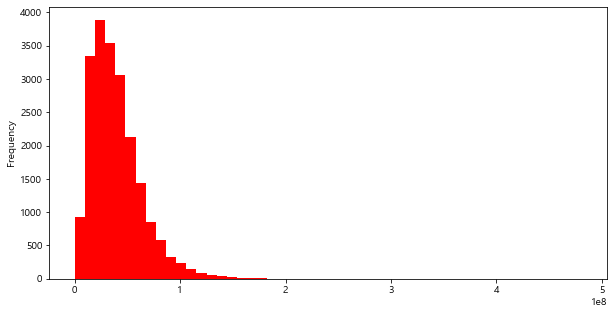

In [115]:
df_gb_mom_code_final2.sales.plot.hist(bins=50, figsize=(10,5), color='r')

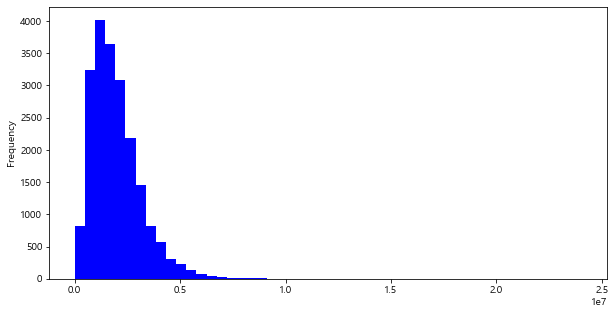

In [116]:
df_gb_mom_code_final2.mean_sales.plot.hist(bins=50, figsize=(10,5), color='b')

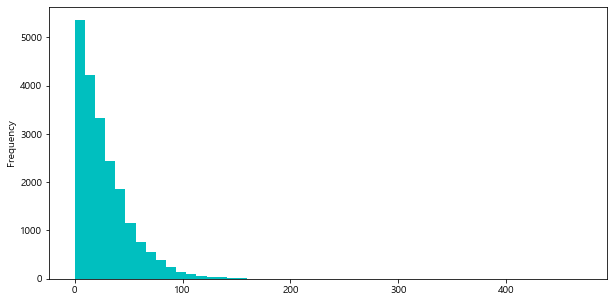

In [117]:
df_gb_mom_code_final2.mean_pd_count.plot.hist(bins=50, figsize=(10,5), color='c')

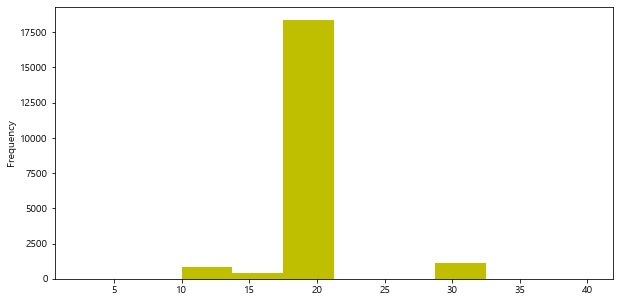

In [152]:
df_gb_mom_code_final2.exp_mins.plot.hist(bins=10, figsize=(10,5), color='y')

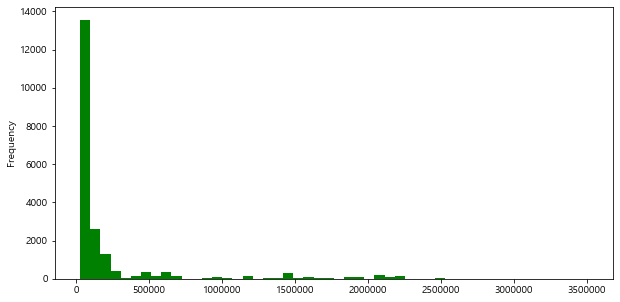

In [119]:
df_gb_mom_code_final2.pd_price.plot.hist(bins=50, figsize=(10,5), color='g')

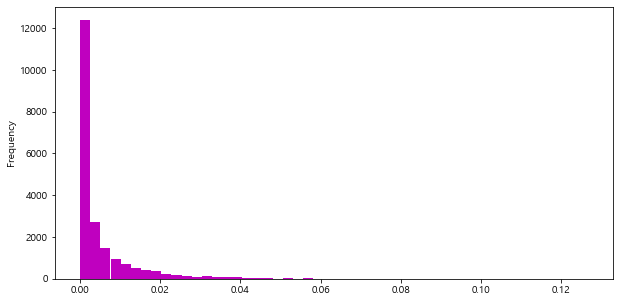

In [125]:
df_gb_mom_code_final2.rating.plot.hist(bins=50, figsize=(10,5), color='m')

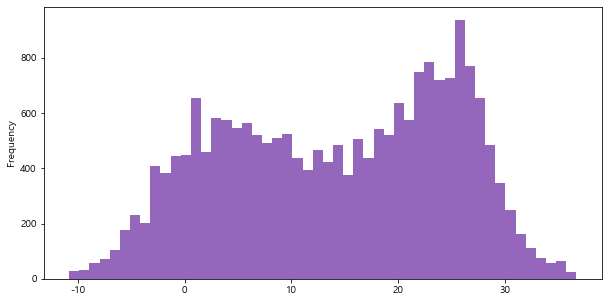

In [139]:
df_gb_mom_code_final2.temp.plot.hist(bins=50, figsize=(10,5), color='tab:purple')

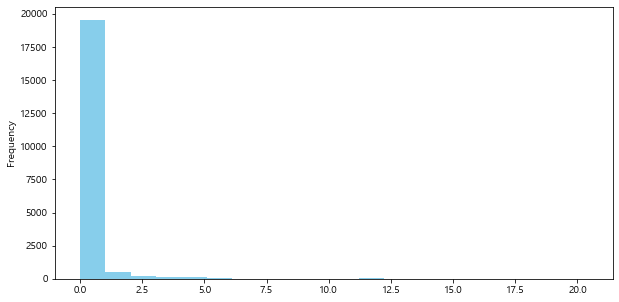

In [150]:
df_gb_mom_code_final2.rain.plot.hist(bins=20, figsize=(10,5), color = 'skyblue')

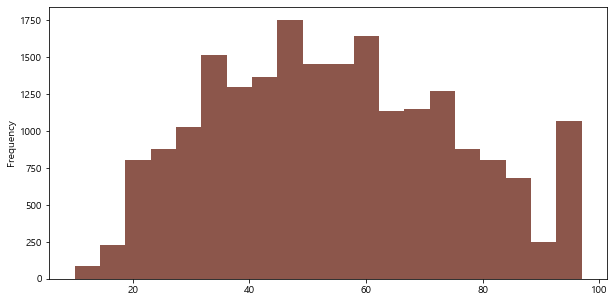

In [149]:
df_gb_mom_code_final2.humidity.plot.hist(bins=20, figsize=(10,5), color='tab:brown')

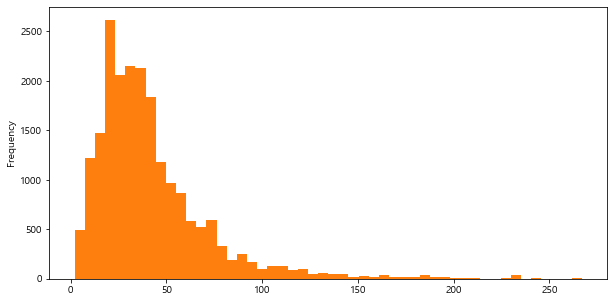

In [148]:
df_gb_mom_code_final2.dust.plot.hist(bins=50, figsize=(10,5), color = 'tab:orange')

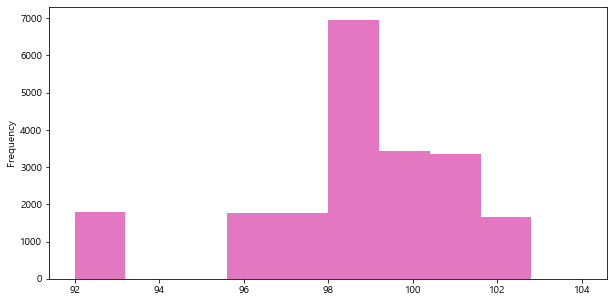

In [146]:
df_gb_mom_code_final2.ccsi.plot.hist(bins=10, figsize=(10,5), color='tab:pink')

In [99]:
df_gb_mom_code_other_cat = df_new[['pd_group', 'date', 'mom_code', 'weekdays', 'seasons', 'is_rain', 'is_snow', 'month', 'day', 'hour']]
df_gb_mom_code_other_cat = df_gb_mom_code_other_cat.drop_duplicates(subset = ['pd_group', 'date', 'mom_code'])
df_gb_mom_code_other_cat = df_gb_mom_code_other_cat.sort_values(['date'])
df_gb_mom_code_other_cat['is_falling'] = df_gb_mom_code_other_cat['is_rain'] + df_gb_mom_code_other_cat['is_snow']
df_gb_mom_code_other_cat['is_falling'] = [0 if i == 0 else 1 for i in df_gb_mom_code_other_cat['is_falling']]
df_gb_mom_code_other_cat

,pd_group,date,mom_code,weekdays,seasons,is_rain,is_snow,month,day,hour,is_falling
0,의류,2019-01-01 06:00:00,100346,Tuesday,1,0,0,1,1,6,0
2,의류,2019-01-01 06:20:00,100346,Tuesday,1,0,0,1,1,6,0
4,의류,2019-01-01 06:40:00,100346,Tuesday,1,0,0,1,1,6,0
6,속옷,2019-01-01 07:00:00,100305,Tuesday,1,0,0,1,1,7,0
7,속옷,2019-01-01 07:20:00,100305,Tuesday,1,0,0,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...
37356,가전,2019-12-31 21:40:00,100155,Tuesday,1,0,0,12,31,21,0
37358,가전,2019-12-31 22:00:00,100155,Tuesday,1,0,0,12,31,22,0
37360,주방,2019-12-31 23:20:00,100448,Tuesday,1,0,0,12,31,23,0
37364,주방,2019-12-31 23:40:00,100448,Tuesday,1,0,0,12,31,23,0


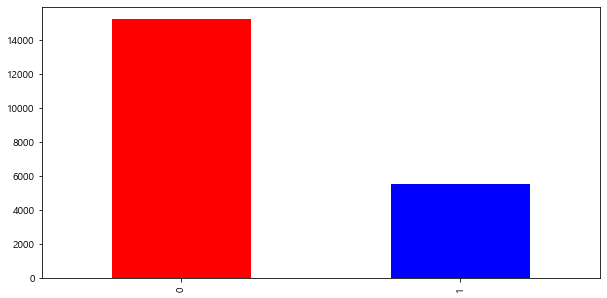

In [110]:
df_gb_mom_code_other_cat.is_rain.value_counts().plot.bar(figsize=(10, 5), color=['r', 'b'])

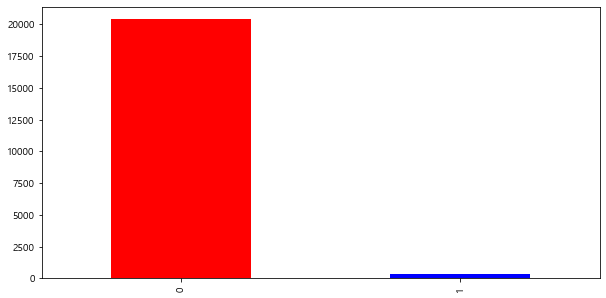

In [109]:
df_gb_mom_code_other_cat.is_snow.value_counts().plot.bar(figsize=(10, 5), color=['r', 'b'])

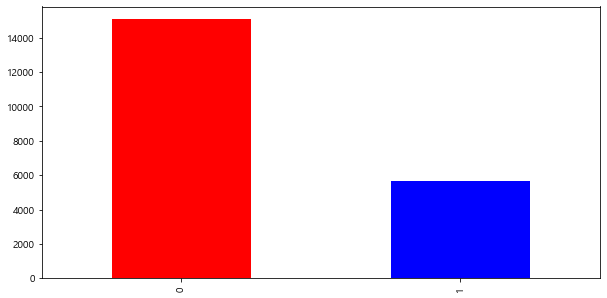

In [108]:
df_gb_mom_code_other_cat.is_falling.value_counts().plot.bar(figsize=(10, 5), color=['r', 'b'])

In [103]:
df_gb_mom_code_other_cat.is_rain.sum() + df_gb_mom_code_other_cat.is_snow.sum(), df_gb_mom_code_other_cat.is_rain.sum(), df_gb_mom_code_other_cat.is_snow.sum()

(5890, 5544, 346)

In [104]:
df_gb_mom_code_other_cat.is_falling.sum()

5659

In [ ]:
plt.hist()

In [154]:
df_final = df_gb_mom_code_final2.merge(df_gb_mom_code_other_cat, how='inner', on = ['pd_group', 'date', 'mom_code'])
df_final

,pd_group,date,mom_code,sales,exp_mins,pd_price,rating,temp,rain,humidity,...,mean_sales,mean_pd_count,weekdays,seasons,is_rain,is_snow,month,day,hour,is_falling
0,의류,2019-01-01 06:00:00,100346,6470000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,323500.0,8.107769,Tuesday,1,0,0,1,1,6,0
1,의류,2019-01-01 06:20:00,100346,10217000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,510850.0,12.803258,Tuesday,1,0,0,1,1,6,0
2,의류,2019-01-01 06:40:00,100346,16009000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,800450.0,20.061404,Tuesday,1,0,0,1,1,6,0
3,속옷,2019-01-01 07:00:00,100305,6819000.0,20.0,59000,0.00000,-7.7,1.0,58.0,...,340950.0,5.778814,Tuesday,1,0,0,1,1,7,0
4,속옷,2019-01-01 07:20:00,100305,15689000.0,20.0,59000,0.00000,-7.7,1.0,58.0,...,784450.0,13.295763,Tuesday,1,0,0,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20720,가전,2019-12-31 21:40:00,100155,67810000.0,20.0,1429000,0.00515,-7.4,0.0,43.0,...,3390500.0,2.372638,Tuesday,1,0,0,12,31,21,0
20721,가전,2019-12-31 22:00:00,100155,104917000.0,20.0,1429000,0.00060,-8.2,0.0,42.0,...,5245850.0,3.670994,Tuesday,1,0,0,12,31,22,0
20722,주방,2019-12-31 23:20:00,100448,15986000.0,20.0,163000,0.00000,-7.4,0.0,45.0,...,799300.0,4.903681,Tuesday,1,0,0,12,31,23,0
20723,주방,2019-12-31 23:40:00,100448,36916000.0,20.0,163000,0.02180,-7.4,0.0,45.0,...,1845800.0,11.323926,Tuesday,1,0,0,12,31,23,0


In [158]:
df_new_columns = df_new.columns.tolist()

In [157]:
df_final_columns = df_final.columns.tolist()

In [160]:
for i in df_new_columns:
    if i not in df_final_columns:
        print(i)

pd_code
pd_name
snow
st_living_csi
eco_judgment_csi
pd_count
month_cat
hour_cat


In [164]:
df_others = df_new[['pd_group', 'date', 'mom_code', 'pd_code', 'pd_name', 'snow', 'pd_count', 'month_cat', 'hour_cat']]
df_others = df_others.drop_duplicates(subset = ['pd_group', 'date', 'mom_code'])
df_others

,pd_group,date,mom_code,pd_code,pd_name,snow,pd_count,month_cat,hour_cat
0,의류,2019-01-01 06:00:00,100346,201072,테이트 남성 셀린니트3종,NaN,53,상반기,오전
2,의류,2019-01-01 06:20:00,100346,201072,테이트 남성 셀린니트3종,NaN,82,상반기,오전
4,의류,2019-01-01 06:40:00,100346,201072,테이트 남성 셀린니트3종,NaN,168,상반기,오전
6,속옷,2019-01-01 07:00:00,100305,200974,오모떼 레이스 파운데이션 브라,NaN,116,상반기,오전
7,속옷,2019-01-01 07:20:00,100305,200974,오모떼 레이스 파운데이션 브라,NaN,266,상반기,오전
...,...,...,...,...,...,...,...,...,...
37356,가전,2019-12-31 21:40:00,100155,200556,일시불 LG전자 매직스페이스 냉장고,NaN,33,하반기,밤
37358,가전,2019-12-31 22:00:00,100155,200556,일시불 LG전자 매직스페이스 냉장고,NaN,54,하반기,밤
37360,주방,2019-12-31 23:20:00,100448,201383,무이자쿠첸압력밥솥 10인용,NaN,26,하반기,밤
37364,주방,2019-12-31 23:40:00,100448,201383,무이자쿠첸압력밥솥 10인용,NaN,52,하반기,밤


In [165]:
df_final = df_final.merge(df_others, how='inner', on = ['pd_group', 'date', 'mom_code'])
df_final

,pd_group,date,mom_code,sales,exp_mins,pd_price,rating,temp,rain,humidity,...,month,day,hour,is_falling,pd_code,pd_name,snow,pd_count,month_cat,hour_cat
0,의류,2019-01-01 06:00:00,100346,6470000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,1,1,6,0,201072,테이트 남성 셀린니트3종,NaN,53,상반기,오전
1,의류,2019-01-01 06:20:00,100346,10217000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,1,1,6,0,201072,테이트 남성 셀린니트3종,NaN,82,상반기,오전
2,의류,2019-01-01 06:40:00,100346,16009000.0,20.0,39900,0.00000,-7.9,1.0,60.0,...,1,1,6,0,201072,테이트 남성 셀린니트3종,NaN,168,상반기,오전
3,속옷,2019-01-01 07:00:00,100305,6819000.0,20.0,59000,0.00000,-7.7,1.0,58.0,...,1,1,7,0,200974,오모떼 레이스 파운데이션 브라,NaN,116,상반기,오전
4,속옷,2019-01-01 07:20:00,100305,15689000.0,20.0,59000,0.00000,-7.7,1.0,58.0,...,1,1,7,0,200974,오모떼 레이스 파운데이션 브라,NaN,266,상반기,오전
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20720,가전,2019-12-31 21:40:00,100155,67810000.0,20.0,1429000,0.00515,-7.4,0.0,43.0,...,12,31,21,0,200556,일시불 LG전자 매직스페이스 냉장고,NaN,33,하반기,밤
20721,가전,2019-12-31 22:00:00,100155,104917000.0,20.0,1429000,0.00060,-8.2,0.0,42.0,...,12,31,22,0,200556,일시불 LG전자 매직스페이스 냉장고,NaN,54,하반기,밤
20722,주방,2019-12-31 23:20:00,100448,15986000.0,20.0,163000,0.00000,-7.4,0.0,45.0,...,12,31,23,0,201383,무이자쿠첸압력밥솥 10인용,NaN,26,하반기,밤
20723,주방,2019-12-31 23:40:00,100448,36916000.0,20.0,163000,0.02180,-7.4,0.0,45.0,...,12,31,23,0,201383,무이자쿠첸압력밥솥 10인용,NaN,52,하반기,밤


In [167]:
df_final.to_csv('df_train_final_groupby_mom_code.csv')